# Stock Market Predictions EDA

In [2]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import pandas_summary
import quandl
import datetime
import fbprophet

## Market Data QuandlIntraday Data API

In [5]:
quandl.ApiConfig.api_key = 'ZNB9kQtgKML6KWfbbMNN'

# Retrieve STOCKS data from Quandl
amzn_df = quandl.get('WIKI/AMZN')
aapl_df = quandl.get('WIKI/AAPL')
msft_df = quandl.get('WIKI/MSFT')
googl_df = quandl.get('WIKI/GOOGL')
ba_df = quandl.get('WIKI/BA')
aal_df = quandl.get('WIKI/AAL')

In [13]:
amzn_df.to_csv('./data/amazon')
aapl_df.to_csv('./data/apple')
msft_df.to_csv('./data/microsoft')
ba_df.to_csv('./data/boeing')
aal_df.to_csv('./data/aairline')

In [8]:
pwd


'C:\\Users\\Sugi\\Documents\\GitHub\\project-capstone\\part-01\\Sugi'

In [14]:
aapl_df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


This dataset presents transactions of 20 Years intraday period Date, Open, High, Low and Close.  The Adjusted Time series have Volume will try to download a later date, see if the prediction be any better with the Volume count

### Data Exploration

In [31]:
aapl_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

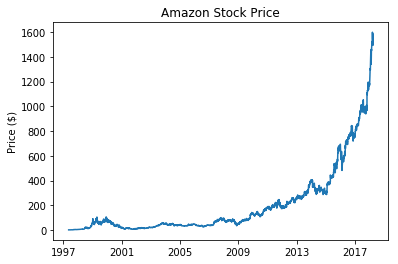

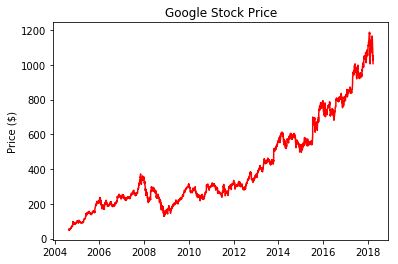

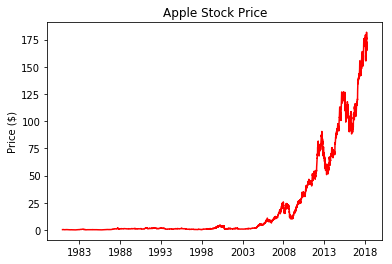

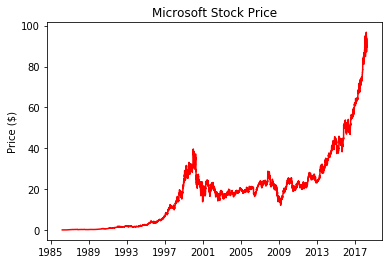

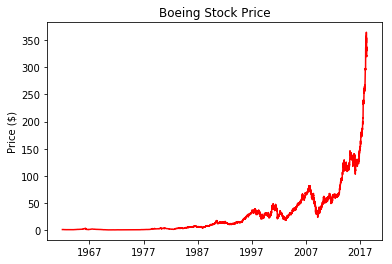

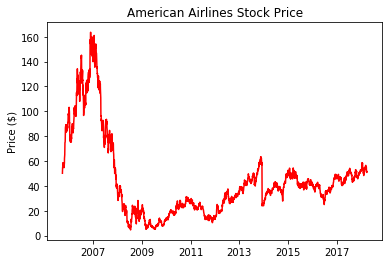

In [15]:
# The close price of Stocks
plt.plot(amzn_df.index, amzn_df['Adj. Close'])
plt.title('Amazon Stock Price')
plt.ylabel('Price ($)');
plt.show()

plt.plot(googl_df.index, googl_df['Adj. Close'], 'r')
plt.title('Google Stock Price')
plt.ylabel('Price ($)');
plt.show();

plt.plot(aapl_df.index, aapl_df['Adj. Close'], 'r')
plt.title('Apple Stock Price')
plt.ylabel('Price ($)');
plt.show();

plt.plot(msft_df.index, msft_df['Adj. Close'], 'r')
plt.title('Microsoft Stock Price')
plt.ylabel('Price ($)');
plt.show();

plt.plot(ba_df.index, ba_df['Adj. Close'], 'r')
plt.title('Boeing Stock Price')
plt.ylabel('Price ($)');
plt.show();

plt.plot(aal_df.index, aal_df['Adj. Close'], 'r')
plt.title('American Airlines Stock Price')
plt.ylabel('Price ($)');
plt.show();

### Create a DataFrame consisting of the adjusted closing price 

First by making a list of these objects and using the join method

In [16]:


stocks = pd.DataFrame({"AAPL": aapl_df["Adj. Close"],
                      "MSFT": msft_df["Adj. Close"],
                      "GOOG": googl_df["Adj. Close"],
                      "AMZN": amzn_df["Adj. Close"],
                      "BA": ba_df["Adj. Close"],
                      "AAL": aal_df["Adj. Close"],
                      })
 
stocks.tail()

,AAPL,MSFT,GOOG,AMZN,BA,AAL
Date,,,,,,
2018-03-21,171.270,92.48,1094.00,1581.86,337.10,54.09
2018-03-22,168.845,89.79,1053.15,1544.10,319.61,52.31
2018-03-23,164.940,87.18,1026.55,1495.56,321.00,51.01
2018-03-26,172.770,93.78,1054.09,1555.86,328.97,51.86
2018-03-27,168.340,89.47,1006.94,1497.05,321.12,50.90


In [17]:
stocks.fillna(value=0, axis=1, inplace=True)

In [18]:
stocks.head()

,AAPL,MSFT,GOOG,AMZN,BA,AAL
Date,,,,,,
1962-01-02,0.0,0.0,0.0,0.0,0.871816,0.0
1962-01-03,0.0,0.0,0.0,0.0,0.889252,0.0
1962-01-04,0.0,0.0,0.0,0.0,0.880534,0.0
1962-01-05,0.0,0.0,0.0,0.0,0.863098,0.0
1962-01-08,0.0,0.0,0.0,0.0,0.865190,0.0


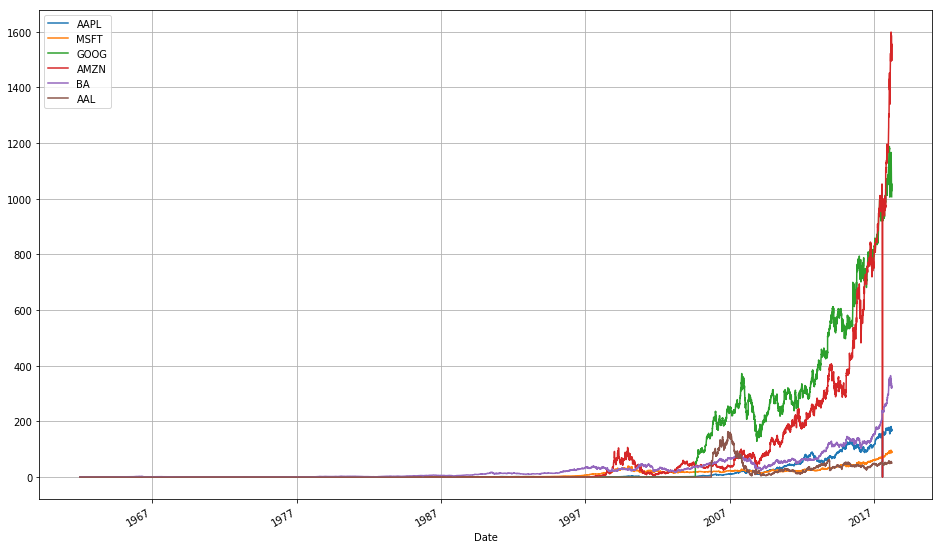

In [19]:
stocks.plot(figsize=(16,10) ,grid=True)

What’s wrong with this chart? While absolute price is important (pricy stocks are difficult to purchase, which affects not only their volatility but your ability to trade that stock), when trading, we are more concerned about the relative change of an asset rather than its absolute price. Google’s stocks are much more expensive than Apple’s or Microsoft’s, and this difference makes Apple’s and Microsoft’s stocks appear much less volatile than they truly are.


### Create New Dataframe for Tech Stock

In [20]:
# Create a Tech Stock DataFrame consisting of the adjusted closing price of these stocks, 
#first by making a list of these objects and using the join method

stocks_tech = pd.DataFrame({"AAPL": aapl_df["Adj. Close"],
                      "MSFT": msft_df["Adj. Close"],
                      "GOOG": googl_df["Adj. Close"],
                      "AMZN": amzn_df["Adj. Close"]
                      
                      })
 
stocks_tech.tail()

,AAPL,MSFT,GOOG,AMZN
Date,,,,
2018-03-21,171.270,92.48,1094.00,1581.86
2018-03-22,168.845,89.79,1053.15,1544.10
2018-03-23,164.940,87.18,1026.55,1495.56
2018-03-26,172.770,93.78,1054.09,1555.86
2018-03-27,168.340,89.47,1006.94,1497.05


### Use 2 different Scale against Apple and Microsoft Stocks

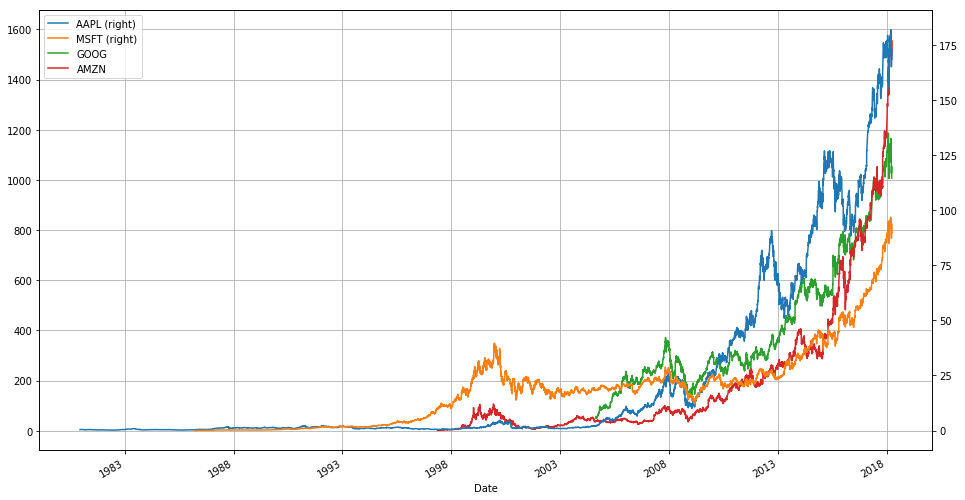

In [21]:
stocks_tech.plot(secondary_y = ["AAPL", "MSFT"], figsize=(16,9), grid = True)

### Create Stocks Return

Transform the data into something more useful for our purposes. 

Consider the stock’s return since the beginning of the period.



In [22]:
# df.apply(arg) will apply the function arg to each column in df, 
# and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; 
#in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,MSFT,GOOG,AMZN,BA,AAL
Date,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,1.0000,NaN
1962-01-03,NaN,NaN,NaN,NaN,1.0200,NaN
1962-01-04,NaN,NaN,NaN,NaN,1.0100,NaN
1962-01-05,NaN,NaN,NaN,NaN,0.9900,NaN
1962-01-08,NaN,NaN,NaN,NaN,0.9924,NaN


In [23]:
stock_return.fillna(value=0, axis=1, inplace=True)

In [24]:
stock_return.head()

,AAPL,MSFT,GOOG,AMZN,BA,AAL
Date,,,,,,
1962-01-02,0.0,0.0,0.0,0.0,1.0000,0.0
1962-01-03,0.0,0.0,0.0,0.0,1.0200,0.0
1962-01-04,0.0,0.0,0.0,0.0,1.0100,0.0
1962-01-05,0.0,0.0,0.0,0.0,0.9900,0.0
1962-01-08,0.0,0.0,0.0,0.0,0.9924,0.0


In [25]:
stock_tech_return = stocks.apply(lambda x: x / x[0])


In [26]:
stock_tech_return.fillna(value=0, axis=1, inplace=True)
stock_tech_return.head()

,AAPL,MSFT,GOOG,AMZN,BA,AAL
Date,,,,,,
1962-01-02,0.0,0.0,0.0,0.0,1.0000,0.0
1962-01-03,0.0,0.0,0.0,0.0,1.0200,0.0
1962-01-04,0.0,0.0,0.0,0.0,1.0100,0.0
1962-01-05,0.0,0.0,0.0,0.0,0.9900,0.0
1962-01-08,0.0,0.0,0.0,0.0,0.9924,0.0


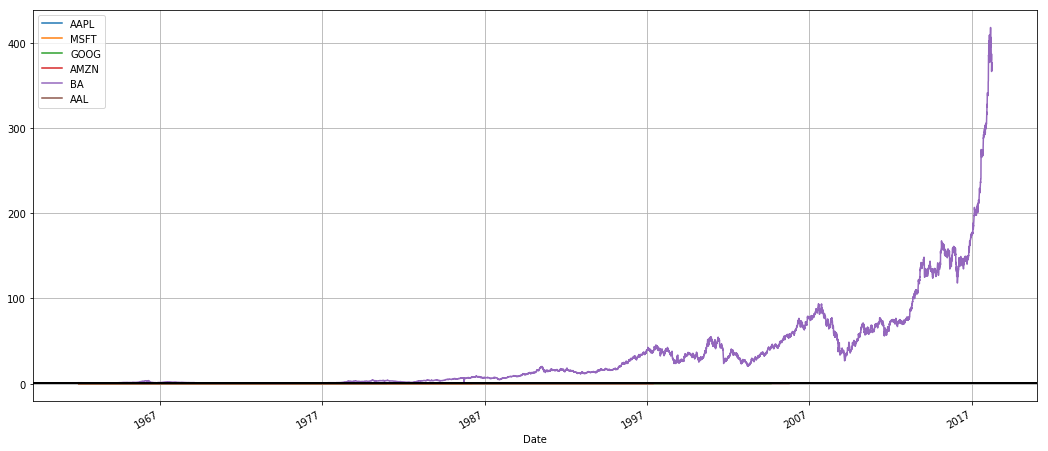

In [27]:
stock_tech_return.plot(figsize=(18,8), grid = True).axhline(y = 1, color = "black", lw = 2)

In [28]:
#  log function, though math's log function would work just as well

 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [29]:
stock_change.fillna(value=0, axis=1, inplace=True)
stock_change.head()

,AAPL,MSFT,GOOG,AMZN,BA,AAL
Date,,,,,,
1962-01-02,0.0,0.0,0.0,0.0,0.000000,0.0
1962-01-03,0.0,0.0,0.0,0.0,0.019803,0.0
1962-01-04,0.0,0.0,0.0,0.0,-0.009852,0.0
1962-01-05,0.0,0.0,0.0,0.0,-0.020001,0.0
1962-01-08,0.0,0.0,0.0,0.0,0.002421,0.0


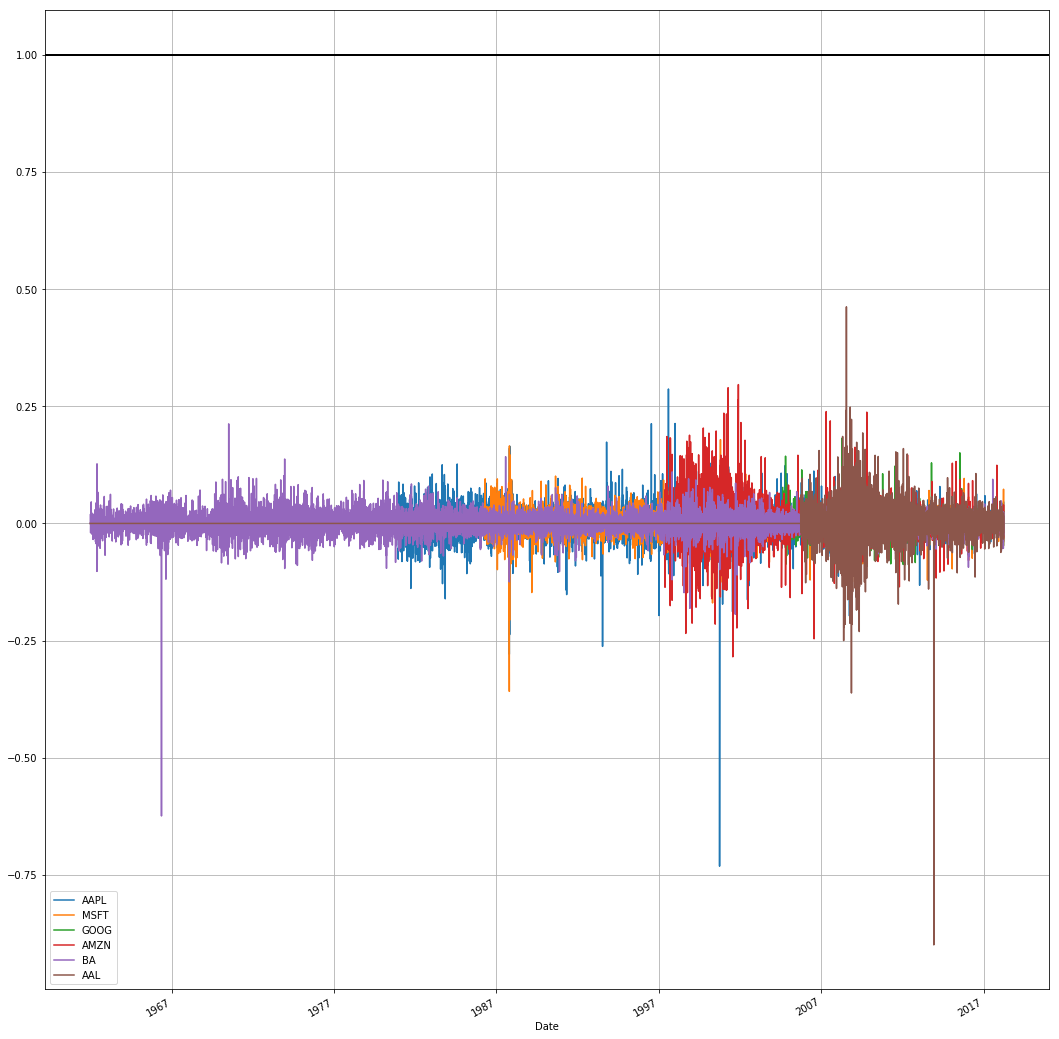

In [30]:
stock_change.plot(figsize=(18,20), grid = True).axhline(y = 1, color = "black", lw = 2)

In [31]:
stock_change.idxmin()

AAPL   1981-08-10
MSFT   1987-10-19
GOOG   2008-09-29
AMZN   2017-08-07
BA     1985-09-27
AAL    2013-12-09
dtype: datetime64[ns]

In [32]:
# Best Single Day Gain

stock_change.idxmax()

AAPL   1980-12-12
MSFT   1986-03-13
GOOG   2004-08-19
AMZN   1997-05-16
BA     1985-09-30
AAL    2005-09-27
dtype: datetime64[ns]

In [34]:
stock_change.head()

,AAPL,MSFT,GOOG,AMZN,BA,AAL
Date,,,,,,
1962-01-02,0.0,0.0,0.0,0.0,0.000000,0.0
1962-01-03,0.0,0.0,0.0,0.0,0.019803,0.0
1962-01-04,0.0,0.0,0.0,0.0,-0.009852,0.0
1962-01-05,0.0,0.0,0.0,0.0,-0.020001,0.0
1962-01-08,0.0,0.0,0.0,0.0,0.002421,0.0


### Create 30days Moving Average based on Closing price of Stock

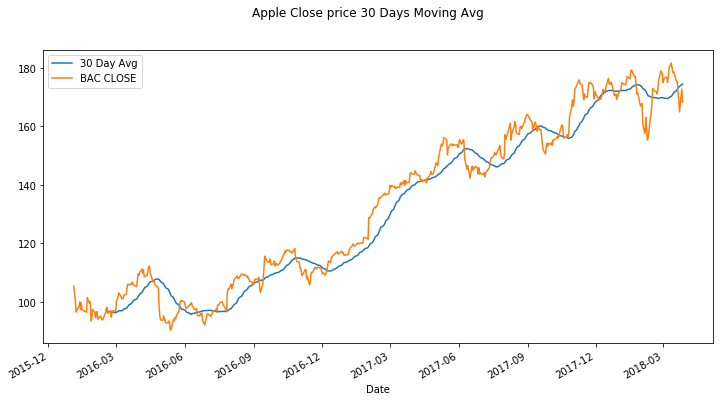

In [88]:
fig = plt.figure
plt.figure(figsize=(12,6))
plt.suptitle('Apple Close price 30 Days Moving Avg')
aapl_df['Close'].loc['2016-01-01':'2018-10-01'].rolling(window=30).mean().plot(label='30 Day Avg')
aapl_df['Close'].loc['2016-01-01':'2018-10-01'].plot(label='BAC CLOSE')
plt.legend();

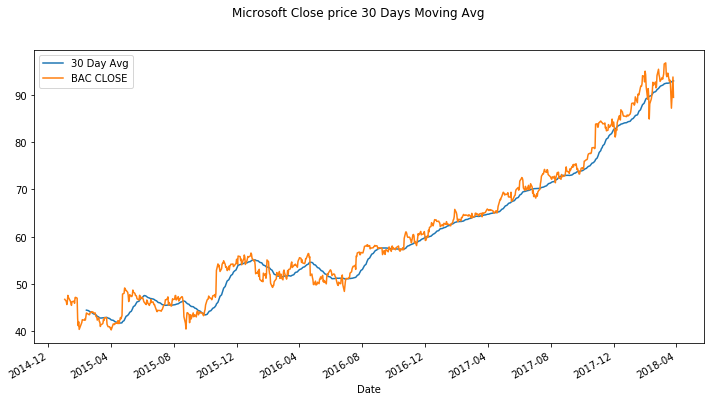

In [86]:
fig = plt.figure
plt.figure(figsize=(12,6))
plt.suptitle('Microsoft Close price 30 Days Moving Avg')
msft_df['Close'].loc['2015-01-01':'2018-10-01'].rolling(window=30).mean().plot(label='30 Day Avg')
msft_df['Close'].loc['2015-01-01':'2018-10-01'].plot(label='BAC CLOSE')
plt.legend();

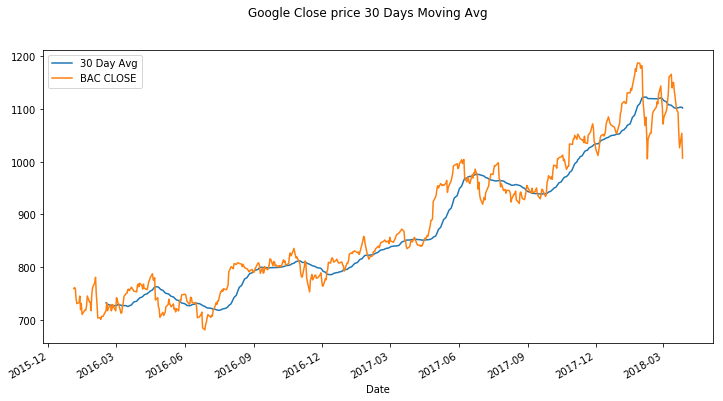

In [45]:
fig = plt.figure
plt.figure(figsize=(12,6))
plt.suptitle('Google Close price 30 Days Moving Avg')
googl_df['Close'].loc['2016-01-01':'2018-10-01'].rolling(window=30).mean().plot(label='30 Day Avg')
googl_df['Close'].loc['2016-01-01':'2018-10-01'].plot(label='BAC CLOSE')
plt.legend();

In [47]:
googl_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


### Data Overview

In [14]:
amzn_df.shape


(5234, 6)

In [15]:
aapl_df.shape

(5235, 6)

In [16]:
amzn_df.info()
amzn_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 6 columns):
Unnamed: 0    5234 non-null int64
Date          5234 non-null object
Low           5234 non-null float64
High          5234 non-null float64
Close         5234 non-null float64
Open          5234 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 245.4+ KB


,Unnamed: 0,Low,High,Close,Open
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000
mean,2616.500000,253.222032,259.585188,256.550525,256.565070
std,1511.069985,370.239650,376.980329,373.785313,374.087086
min,0.000000,5.510000,6.100000,5.970000,5.910000
25%,1308.250000,40.740000,42.377500,41.510000,41.400000
50%,2616.500000,89.750000,93.920000,91.470000,91.845000
75%,3924.750000,290.637500,298.880000,295.157500,294.817500
max,5233.000000,2013.000000,2050.500000,2039.510000,2038.110000


In [17]:
aapl_df.info()
aapl_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 6 columns):
Unnamed: 0    5235 non-null int64
Date          5235 non-null object
Low           5235 non-null float64
High          5235 non-null float64
Close         5235 non-null float64
Open          5235 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 245.5+ KB


,Unnamed: 0,Low,High,Close,Open
count,5235.00000,5235.000000,5235.000000,5235.000000,5235.000000
mean,2617.00000,156.203878,159.916025,158.097560,158.146347
std,1511.35866,160.042499,162.866670,161.472928,161.586545
min,0.00000,12.720000,13.190000,13.120000,12.990000
25%,1308.50000,37.000000,38.470000,37.835000,37.875000
50%,2617.00000,104.590000,107.580000,105.870000,105.930000
75%,3925.50000,184.715000,188.392000,186.435000,186.840000
max,5234.00000,699.570000,705.070000,702.100000,702.410000


In [ ]:
amzn_df = amzn_df.drop(['Unnamed: 0'])

### Sort Dataframe by Date

In [18]:
amzn_df = df.sort_values('Date', ascending=True)
aapl_df = df.sort_values('Date', ascending=True)
msft_df = df.sort_values('Date', ascending=True)
googl_df = df.sort_values('Date', ascending=True)
ba_df = df.sort_values('Date', ascending=True)
aal_df = df.sort_values('Date', ascending=True)


### Combine All Stocks to a single Dataframe

In [ ]:
#stocks = pd.concat([amzn_df,aapl_df,msft_df,googl_df,ba_df,aal_df])